## Домашнее задание №1: Полносвязные нейронные сети

### Пожалуйста, заполните имя

In [1]:
STUDENT_NAME = "FirstName LastName" # For example, Fedor Petriaikin

In [81]:
# Включает режим проверки
from importlib import reload

try:
    import test_lib
    reload(test_lib)
    TEST_MODE = True
except:
    TEST_MODE = False

In [82]:
import numpy as np
import matplotlib.pyplot as plt

**Не удаляйте клетки из этого jupyter-notebok! Это затруднит проверку!**

В этом задании вам предстоит самостоятельно самостоятельно реализовать простую полносвязную нейронную сеть, процедуру обучения. Правильность нашей реализации мы проверим на примере задачи распознавания рукописных цифр (датасет MNIST).

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции:
1. forward(X) - применяет функцию, реализуемую слоем, к входной матрице (X), X.shape = N x features_size, N - размер батча
2. backward(dLdy) - которая по $\frac{\partial L}{\partial y}$ будет вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$, dLdy.shape - N x 1 = градиент по каждому из объектов батча
3. step(learning_rate), которая будет обновлять веса в слое

Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов (размер batch-а), а d (то же, что и input_size, features_count) — размерность каждого объекта.

### Задание 1
**Требуется реализовать слои (в layers.py):**  
1. Linear. В инициализацию весов следует сделать из N(0, 0.01)
2. Sigmoid, ReLU, ELU, Tanh - нелинейности
3. SoftMax_NLLLoss. Обратите внимание, что это особый слой - он совмещает в себе и слой-предиктор, и функцию ошибок. Это нужно, чтобы упросить расчет градиента с помощью трюка log-sum-exp (позволяет избежать численных неустойчивостей):  
https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/
4. MSE_Error - loss-функция, считает dL/dy для запуска backprop.
5. NeuralNetwork - класс, объединяющий слои

**Обратите внимание**
1. Изменять интерфейс классов в layers.py **не следует**, т.к. иначе тестирующий код не сможет выполниться
2. Важным требованием к реализации является векторизация всех слоев: **все операции должны быть сведены к матричным**, не должно быть циклов. Это значительно уменьшает временные затраты.
3. Отличная визуализация работы полносвязных нейронных сетей: http://playground.tensorflow.org/

### Проверка задания 1
Нужно написать свой код для проверки и пройти тесты кода, который не предоставляется

In [83]:
import layers
reload(layers)

<module 'layers' from 'F:\\programming\\teaching\\2019_tehnotrack\\homeworks\\hw01\\task\\solved\\layers.py'>

**Проверка 1 - численный градиент**

1. Релизуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

2. Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

3. По аналогии, протестируйте SoftMax_NLLLoss

In [84]:
# 1.
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    #### YOUR CODE HERE
    pass

# 2. Проверка слоя Linear
lin = layers.Linear(10, 2)
X = np.ones((5, 10))
y = lin.forward(X)

func = lambda x: lin.forward(x).sum() # Аналог функции ошибок
dLdy = np.ones((5, 2)) # Очевидно, что производная суммы по всем y = 1
gradient = lin.backward(dLdy)
print("Check grad linear: {}".format(check_gradient(func, X, gradient)))

#3. Проверка SoftMax_NLLLoss
#### YOUR CODE HERE

Check grad linear: None


In [85]:
# Проверка вашей реализации check_gradient и Linear
# Не изменяйте эту ячейку!
if TEST_MODE:
    try:
        test_lib.test_grad_checker(test_lib.check_gradient)
        test_lib.check_grads(layers.Linear, layers.Sigmoid, layers.SoftMax_NLLLoss, layers.Tanh)
    except Exception as e:
        print("!!>> Tasks grad_check failed:")
        raise e

!!>> Task test_grad_checker passed
!!>> Task check_linear_grad passed
!!>> Task check_sigmoid_grad passed
!!>> Task check_tanh_grad passed
!!>> Task check_nll_grad passed


**Проверка 2**  
Следующий код должен выполниться и дать корректную классификацию объектов. Это нужно, чтобы проверить интерфейс классов из layers

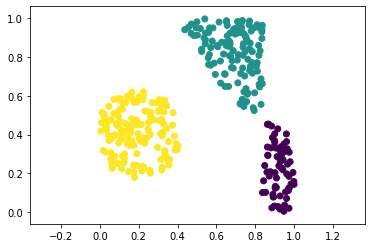

In [86]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

In [87]:
arc = [layers.Linear(2, 3), layers.Sigmoid(), layers.Linear(3, 3), layers.SoftMax_NLLLoss()]
network = layers.NeuralNetwork(arc)

def learn_network(network, X, y, learning_rate=0.1, iterations=16000):
    for i in range(iterations):
        prediction = network.forward(X)
        network.backward(y)
        network.step(learning_rate)

learn_network(network, X, y)

In [88]:
def plot_mesh_with_scatter(X, y, pred_func, N=50, additional=0.15):
    '''
    pred_func(mesh) - returns classes from mesh grid
    '''
    delta_x = (np.max(X[:, 0])-np.min(X[:, 0]))*additional
    delta_y = (np.max(X[:, 1])-np.min(X[:, 1]))*additional
    
    x_grid = np.linspace(np.min(X[:, 0])-delta_x, np.max(X[:, 0])+delta_x, N)
    y_grid = np.linspace(np.min(X[:, 1])-delta_y, np.max(X[:, 1])+delta_y, N)
    X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
    mesh = np.dstack((X_mesh, Y_mesh)).reshape(N*N, 2)
    
    predictions = pred_func(mesh)
    
    plt.scatter(mesh[:, 0], mesh[:, 1], c=predictions, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.axis('equal')
    plt.show()

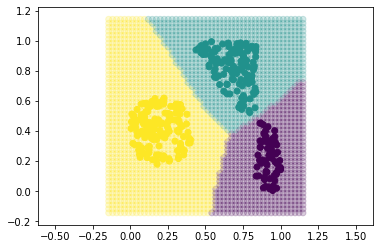

In [89]:
plot_mesh_with_scatter(X, y, lambda x: np.argmax(network.forward(x), 1))

### Задание 2
1. Попробуйте разные темпы обучения (6-7 значений в пределах 0.01 - 20, с логарифмическим масштабом).  
Как меняется сходимость и почему? Нарисуйте график оптимального значения функции потерь для различных значений learning_rate (для этого реализуйте в нейронной сети и ее слоях функцию get_loss)
2. Решите поставленную выше задачу как задачу регрессии с MSE. Изменилась ли разделяющая поверхность? Нарисуйте ее, с помощью plot_mesh_with_scatter.

**На это задание нет специальных тестов, оно проверяется вручную**

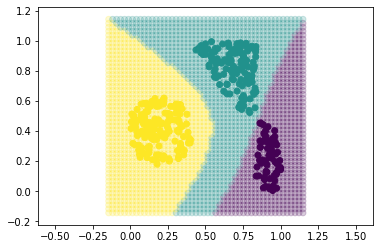

In [90]:
### YOUR CODE HERE
arc = [layers.Linear(2, 5), layers.Sigmoid(), layers.Linear(5, 3), layers.Sigmoid(), layers.Linear(3, 1)]
network_mse = layers.NeuralNetwork(arc, layers.MSE_Error())
learn_network(network_mse, X, y, iterations=5000, learning_rate=0.5)

def f(x):
    return np.around(network_mse.forward(x), 0).flatten()
plot_mesh_with_scatter(X, y, f)

### Распознование рукописных цифр
Ниже приведен код для загрузки датасета и визуализация нескольких объектов из него

In [91]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
%matplotlib inline

In [92]:
# Не изменяйте имена в этой ячейке! Они нужны для тестов
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)) # Нормализация данных
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

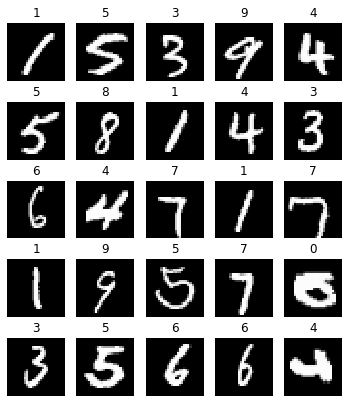

In [93]:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Задание 3
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности (объект создан ниже).  
Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.4. Число эпох выберете по своему усмотрению.

**Обратите внимание**  
1. Итерироваться по данным можно с помощью выражения *for X, y in some_loader* При этом X, y - будут иметь тип torch.Tensor. Чтобы конвертировать их в numpy-массивы нужно вызвать функцию .numpy()
2. Каждый объект из X имеет размерность 1x28x28. Поэтому перед .numpy() нужно вызвать *X = X.view(X.shape[0], -1)*, чтобы получить одномерный массив
3. Качество на тесте (масксимальное среди эпох) должно быть не хуже **0.972**

In [94]:
learning_rate = 0.4

In [95]:
def train_nn(network, epochs, learning_rate, train=train_loader, test=test_loader):
    ### YOUR CODE HERE
    pass

In [96]:
if not TEST_MODE:
    epochs_count = 0 # Введите сюда число эпох

    neural_network = layers.NeuralNetwork([layers.Linear(784, 100), layers.Sigmoid(), layers.Linear(100, 100), 
                                           layers.Sigmoid(), layers.Linear(100, 10), layers.SoftMax_NLLLoss()])
    train_nn(neural_network, epochs_count, learning_rate)

### Проверка задания 3


Epoch 0... Accuracy: 0.641/0.933

Epoch 1... Accuracy: 0.948/0.960

Epoch 2... Accuracy: 0.966/0.965

Epoch 3... Accuracy: 0.974/0.968

Epoch 4... Accuracy: 0.979/0.969

Epoch 5... Accuracy: 0.983/0.968

Epoch 6... Accuracy: 0.986/0.970

Epoch 7... Accuracy: 0.989/0.973

Best for test: 0.9734424920127795

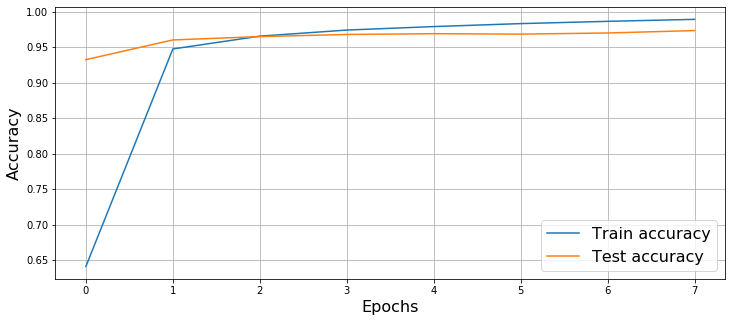

!!>> Task task3_sigmoid_nn passed


In [97]:
# Проверка качества нейронной сети
if TEST_MODE:
    test_lib.train_task3(learning_rate, train_loader, test_loader)

### Задание 4
Обучите нейронную сеть как в задании 3, но используйте в качестве нелинейности ELU и ReLU. Качество должно быть не менее **0.977** в каждом случае (можно подбирать learning_rate, число эпох, коэффициенты в ELU/ReLU)

In [98]:
# Подбирайте параметры с помощью этих параметров
learning_rate_elu  = 0.05
learning_rate_relu = 0.05

epochs_elu = 15
epochs_relu = 15

a_elu = 0.1
a_relu = 0.1

In [99]:
if not TEST_MODE:
    ### YOUR CODE HERE
    pass

### Проверка задания 4


Epoch 0... Accuracy: 0.792/0.938

Epoch 1... Accuracy: 0.956/0.965

Epoch 2... Accuracy: 0.969/0.972

Epoch 3... Accuracy: 0.977/0.971

Epoch 4... Accuracy: 0.982/0.974

Epoch 5... Accuracy: 0.984/0.969

Epoch 6... Accuracy: 0.987/0.977

Best for test: 0.9770367412140575

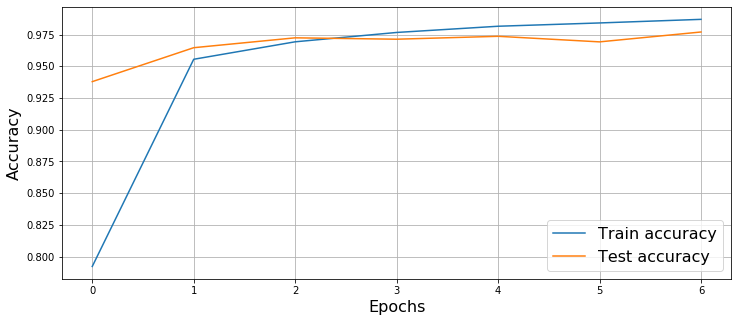

!!>> Task task4_elu passed


In [100]:
# Проверка качества нейронной сети (ELU)
if TEST_MODE:
    test_lib.train_task4_elu(a_elu, learning_rate_elu, epochs_elu, train_loader, test_loader)


Epoch 0... Accuracy: 0.794/0.943

Epoch 1... Accuracy: 0.952/0.960

Epoch 2... Accuracy: 0.968/0.973

Epoch 3... Accuracy: 0.975/0.974

Epoch 4... Accuracy: 0.980/0.973

Epoch 5... Accuracy: 0.983/0.977

Best for test: 0.9770367412140575

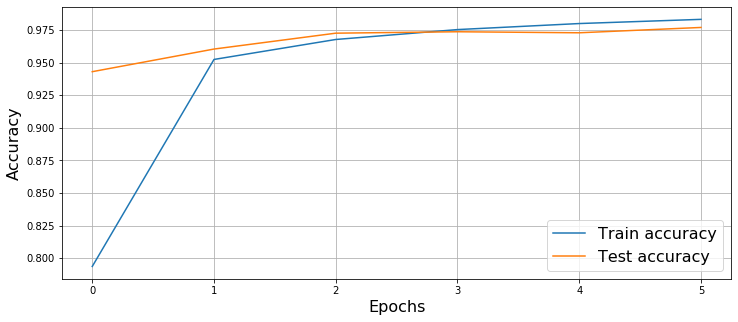

!!>> Task task4_relu passed


In [101]:
# Проверка качества нейронной сети (ReLU)
if TEST_MODE:
    test_lib.train_task4_relu(a_relu, learning_rate_relu, epochs_relu, train_loader, test_loader)

### Задание 5
Примените аугментацию:
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности? Постарайтесь добиться максимального качества, не изменяя размерности слоев

In [102]:
from scipy.ndimage.interpolation import shift, rotate

In [116]:
# X - np.array, X.shape = batch_size x 1 x 28 x 28
def add_noise(X, noise_std):
    ### YOUR CODE HERE
    X += np.random.standard_normal(X.shape) * noise_std
    return X

def random_shift(X, max_shift):
    ### YOUR CODE HERE
    shift_x = -max_shift + np.random.random()*max_shift*2
    shift_y = -max_shift + np.random.random()*max_shift*2
    return shift(X, (0, 0, shift_x, shift_y))

def random_rotation(X, max_rot=15):
    ### YOUR CODE HERE
    rotation = -max_rot + np.random.random()*max_rot*2
    return rotate(X, rotation, (2, 3), False)

In [104]:
# Исправьте функцию train, чтобы она принимала augmentations - массив функций f(x),
# которые производят преобразования-аугментации
# Воспользуйтесь X.numpy(), а потом ndarray.view() для сокращения числа размеростей
def train_nn_aug(network, epochs, learning_rate, augmentations, train=train_loader, test=test_loader):
    ### YOUR CODE HERE
    pass

In [105]:
# Проанализируйте различные аугментации
### YOUR CODE HERE

In [117]:
# В этих функциях нужно создать нейронную сеть и массив функций-аугментаторов, которые дают наилучший скор
def create_best_nn():
    '''
    Returns NeuralNetwork object
    '''
    ### YOUR CODE HERE
    return layers.NeuralNetwork([layers.Linear(784, 100), layers.ReLU(0.1), layers.Linear(100, 100), 
                                 layers.ReLU(0.1), layers.Linear(100, 10), layers.SoftMax_NLLLoss()])
    pass

def create_best_augmentations():
    '''
    Returns array with aurmentation functions
    '''
    return [lambda X: random_rotation(X, 7)]

# Здесь же можно задать learning_rate и число эпох
learning_rate = 0.05
epochs_count = 15

### Проверка задания 5


Epoch 0... Accuracy: 0.788/0.941

Epoch 1... Accuracy: 0.950/0.962

Epoch 2... Accuracy: 0.965/0.967

Epoch 3... Accuracy: 0.972/0.970

Epoch 4... Accuracy: 0.977/0.975

Epoch 5... Accuracy: 0.980/0.975

Epoch 6... Accuracy: 0.982/0.975

Epoch 7... Accuracy: 0.984/0.975

Epoch 8... Accuracy: 0.985/0.975

Best for test: 0.9752396166134185

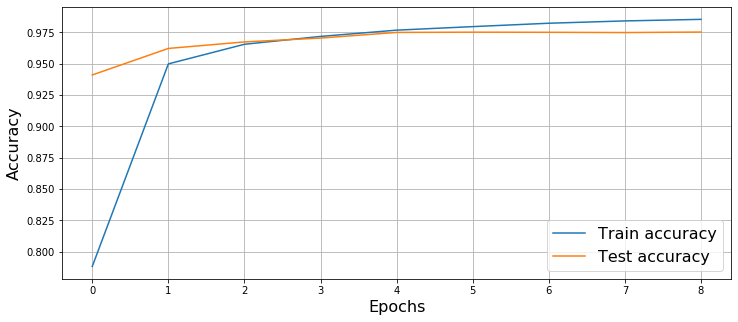

!!>> Task task5 NOT passed


In [118]:
reload(test_lib)
# Проверка качества нейронной сети
if TEST_MODE:
    test_lib.train_task5(create_best_nn, create_best_augmentations, learning_rate, epochs_count,
                         train_loader, test_loader)